In [2]:
#ANN 
!pip install tensorflow-gpu

     |████████████████████████████████| 497.5 MB 24 kB/s 
     |████████████████████████████████| 462 kB 44.3 MB/s 


In [3]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [4]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#divide dataset into dependent and independent features
 

In [9]:
X = dataset.iloc[: ,3:13]
y = dataset.iloc[: ,-1]

In [10]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [11]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [15]:
geography = pd.get_dummies(X['Geography'], drop_first = True)


In [16]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [17]:
gender  = pd.get_dummies(X['Gender'], drop_first= True)

In [18]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [27]:
X = X.drop(['Geography', 'Gender'], axis = 1)

In [21]:
X = pd.concat([X, geography, gender], axis = 1)

In [22]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [30]:
#Split dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
8116,640,43,9,94752.49,1,1,0,184006.36,1,0,0
4073,581,30,0,53291.86,1,0,0,196582.28,0,1,1
4050,803,41,9,137742.90,2,1,1,166957.82,1,0,1
5453,714,25,4,0.00,2,0,0,82500.84,0,0,0
2368,557,48,10,0.00,2,1,1,185094.48,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4914,734,47,10,91522.04,2,1,1,138835.91,1,0,0
3595,722,32,5,106807.64,1,1,1,76998.69,1,0,0
5385,813,36,6,98088.09,1,0,1,26687.22,1,0,0
840,732,50,6,145338.76,1,0,0,91936.10,1,0,1


In [32]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [33]:
X_train.shape

(8000, 11)

In [34]:
#Create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU , ReLU
from tensorflow.keras.layers import Dropout

In [35]:
#Initialize ANN
classifier = Sequential()

In [36]:
#Adding input layers
classifier.add(Dense(units = 11, activation = 'relu'))

In [61]:
#Add first hidden layer
classifier.add(Dense(units = 7, activation = 'relu'))
classifier.add(Dropout  (0.2))

In [38]:
#Add second hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))

In [39]:
#Adding output layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [43]:
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
import tensorflow

In [42]:
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [44]:
model_history = classifier.fit(X_train, y_train, validation_split =0.33, batch_size = 10, epochs = 1000)

536/536 [==============================] - 3s 5ms/step - loss: 0.3155 - accuracy: 0.8694 - val_loss: 0.4109 - val_accuracy: 0.8493
Epoch 99/1000
164/536 [========>.....................] - ETA: 1s - loss: 0.2921 - accuracy: 0.8823

KeyboardInterrupt: ignored

In [45]:
#Early stopping
#When accuracy isn't increasing, training will stop

In [47]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [48]:
model_history = classifier.fit(X_train, y_train, validation_split =0.33, batch_size = 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3135 - accuracy: 0.8705 - val_loss: 0.4167 - val_accuracy: 0.8512
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3155 - accuracy: 0.8696 - val_loss: 0.4217 - val_accuracy: 0.8489
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3131 - accuracy: 0.8709 - val_loss: 0.4061 - val_accuracy: 0.8535
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3169 - accuracy: 0.8696 - val_loss: 0.4180 - val_accuracy: 0.8455
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3188 - accuracy: 0.8701 - val_loss: 0.4036 - val_accuracy: 0.8485
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3153 - accuracy: 0.8718 - val_loss: 0.3947 - val_accuracy: 0.8485
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3145 - accuracy: 0.8681 - val_loss: 0.3880 - val_accuracy:

In [50]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

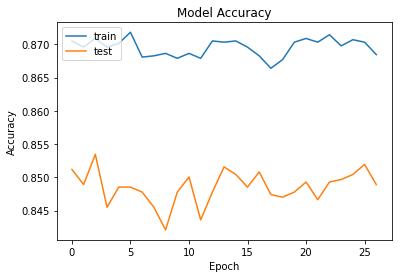

In [52]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['train','test'], loc = 'upper left')

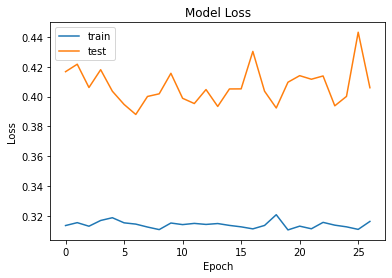

In [53]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.legend(['train','test'], loc = 'upper left')

In [54]:
#Making predictions and evaluating model
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [56]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1557,   35],
       [ 251,  157]])

In [58]:
from sklearn.metrics import accuracy_score
score  =  accuracy_score(y_pred, y_test)

In [59]:
score

0.857

In [60]:
#To get the weights
classifier.get_weights()

[array([[-1.8026762 ,  2.5257192 ,  1.2971075 , -1.3388149 , -0.5302473 ,
         -0.3814335 , -1.4216342 , -1.1009074 , -2.0583606 , -1.9918708 ,
         -1.4280502 ],
        [-0.33430955,  1.4646362 , -4.129105  , -2.0844967 , -6.0737233 ,
         -3.5973465 , -4.288385  ,  1.9820879 , -6.6703634 ,  3.670458  ,
          2.2818813 ],
        [ 1.8693292 , -0.49640158,  0.58855516,  0.7078589 ,  0.09621797,
         -1.6947166 ,  1.4530085 , -0.66814035,  0.3686505 ,  0.5753001 ,
         -0.29367557],
        [-0.09642328, -2.4081542 ,  3.2533698 , -2.6808999 ,  0.83313334,
          2.704281  ,  0.24931575,  1.5126026 , -0.6325479 ,  1.2054492 ,
         -1.6174524 ],
        [ 0.0712458 ,  1.2644724 ,  1.1281881 , -1.6404011 , -2.552083  ,
          1.0663908 ,  2.5859141 ,  4.886868  , -0.30673897, -1.3561493 ,
         -7.12848   ],
        [-1.7594762 ,  3.033083  , -2.3875048 , -0.6822158 , -0.17276739,
          2.4548335 , -0.8988175 ,  0.41082332, -0.86060935,  0.9253157